# Exercise - Classification of Liver Disease Patients

The dataset is classification of patients having liver disease. It is available at https://www.kaggle.com/uciml/indian-liver-patient-records/data.

We will classify this data using Random Forest Trees and Decision Trees.

### Perform the following operations:
1. Read the data into python using pandas. 
2. Plot the following:  
   Number of cases having liver disease and no disease  
   Number of cases having liver disease and no disease gender wise, two separate graphs  
   Heat map of Correlation Matrix of the entire dataset. Are there are any interconnected features looking at the matrix?  
   A pairwise scatter plot of all the features, separated by records having disease and not having diseases. Example image is attached below. 
3. If there is a positive or a negative correlation between any features, remove either of them from the dataset. If there are any NaNs in the dataset, fill them up as well with a suitable method. Convert any string categories into numeric. 
4. Split your data manually into training and testing. Make sure you get an equal distribution of both the classes in the training dataset. 
5. Perform Decision Tree classification with entropy gain with a depth of 3 & 4. 
7. Compare your output with the following metrics:  
   Confusion Matrix, Decision Tree.
8. Plot the decision trees for all the models.
   ![Image](./data/example_image.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('./data/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=="Male" else 1)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


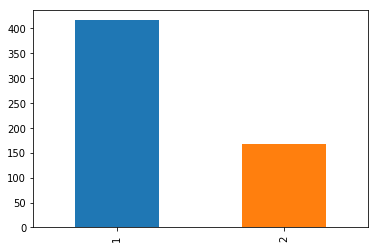

In [5]:
liver_disease = df[df['Dataset'] == 2]
non_liver_disease = df[df['Dataset'] == 1]

df['Dataset'].value_counts().plot(kind='bar')

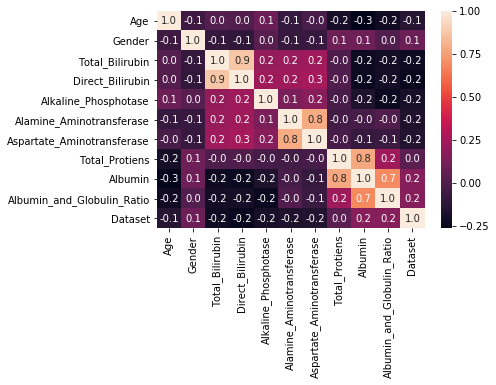

In [6]:
import seaborn
seaborn.heatmap(df.corr(), annot=True, fmt='.1f')

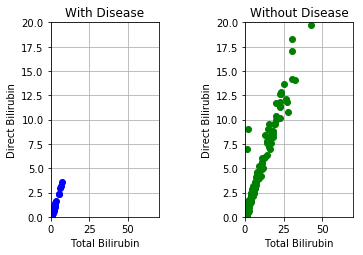

In [7]:
plt.subplot(121)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.grid()
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.title("With Disease")
plt.xlim([0, 70])
plt.ylim([0, 20])
plt.plot(liver_disease['Total_Bilirubin'], liver_disease['Direct_Bilirubin'], linestyle="None", marker='o', color='b')
plt.subplot(122)
plt.grid()
plt.xlim([0, 70])
plt.ylim([0, 20])
plt.title("Without Disease")
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.plot(non_liver_disease['Total_Bilirubin'], non_liver_disease['Direct_Bilirubin'], linestyle="None", marker='o', color='g')

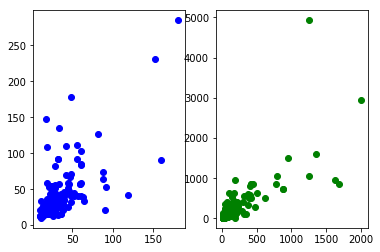

In [8]:
plt.subplot(121)
plt.plot(liver_disease['Alamine_Aminotransferase'], liver_disease['Aspartate_Aminotransferase'], linestyle="None", marker='o', color='b')
plt.subplot(122)
plt.plot(non_liver_disease['Alamine_Aminotransferase'], non_liver_disease['Aspartate_Aminotransferase'], linestyle="None", marker='o', color='g')

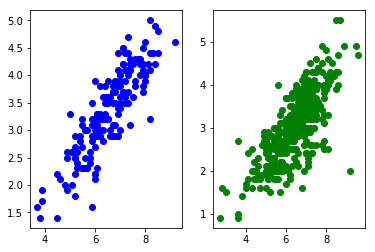

In [9]:
plt.subplot(121)
plt.plot(liver_disease['Total_Protiens'], liver_disease['Albumin'], linestyle="None", marker='o', color='b')
plt.subplot(122)
plt.plot(non_liver_disease['Total_Protiens'], non_liver_disease['Albumin'], linestyle="None", marker='o', color='g')

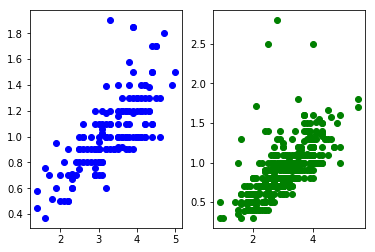

In [10]:
plt.subplot(121)
plt.plot(liver_disease['Albumin'], liver_disease['Albumin_and_Globulin_Ratio'], linestyle="None", marker='o', color='b')
plt.subplot(122)
plt.plot(non_liver_disease['Albumin'], non_liver_disease['Albumin_and_Globulin_Ratio'], linestyle="None", marker='o', color='g')

In [11]:
df = df.drop(['Aspartate_Aminotransferase', 'Direct_Bilirubin'], axis=1)
df.head()


,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,187,16,6.8,3.3,0.90,1
1,62,0,10.9,699,64,7.5,3.2,0.74,1
2,62,0,7.3,490,60,7.0,3.3,0.89,1
3,58,0,1.0,182,14,6.8,3.4,1.00,1
4,72,0,3.9,195,27,7.3,2.4,0.40,1


In [12]:
cols = df.columns.values
df["Albumin_and_Globulin_Ratio"] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())
liver_disease["Albumin_and_Globulin_Ratio"] = liver_disease['Albumin_and_Globulin_Ratio'].fillna(liver_disease['Albumin_and_Globulin_Ratio'].mean())
non_liver_disease["Albumin_and_Globulin_Ratio"] = non_liver_disease['Albumin_and_Globulin_Ratio'].fillna(non_liver_disease['Albumin_and_Globulin_Ratio'].mean())

In [13]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
X_train = pd.concat([liver_disease[cols[:-1]].iloc[0:100], non_liver_disease[cols[:-1]].iloc[0:100]])
y_train = pd.concat([liver_disease[cols[-1]].iloc[0:100], non_liver_disease[cols[-1]].iloc[0:100]])

X_test = pd.concat([liver_disease[cols[:-1]].iloc[100:], non_liver_disease[cols[:-1]].iloc[100:]])
y_test = pd.concat([liver_disease[cols[-1]].iloc[100:], non_liver_disease[cols[-1]].iloc[100:]])

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(df[cols[:-1]], df['Dataset'])
obtained_tree = decisiontree.fit(X_train, y_train)

In [16]:
obtained_y = obtained_tree.predict(X_test)

In [17]:
confusion_matrix(y_test, obtained_y)

array([[192, 124],
       [ 20,  47]], dtype=int64)

In [18]:
print(classification_report(y_test, obtained_y))

             precision    recall  f1-score   support

          1       0.91      0.61      0.73       316
          2       0.27      0.70      0.39        67

avg / total       0.80      0.62      0.67       383



In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(obtained_tree, df[cols[:-1]], df['Dataset'], cv=10)
print("Cross-validated scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated scores: [0.6779661  0.72881356 0.72881356 0.72881356 0.69491525 0.61016949
 0.74137931 0.68421053 0.70175439 0.71929825]
Accuracy: 0.70 (+/- 0.07)


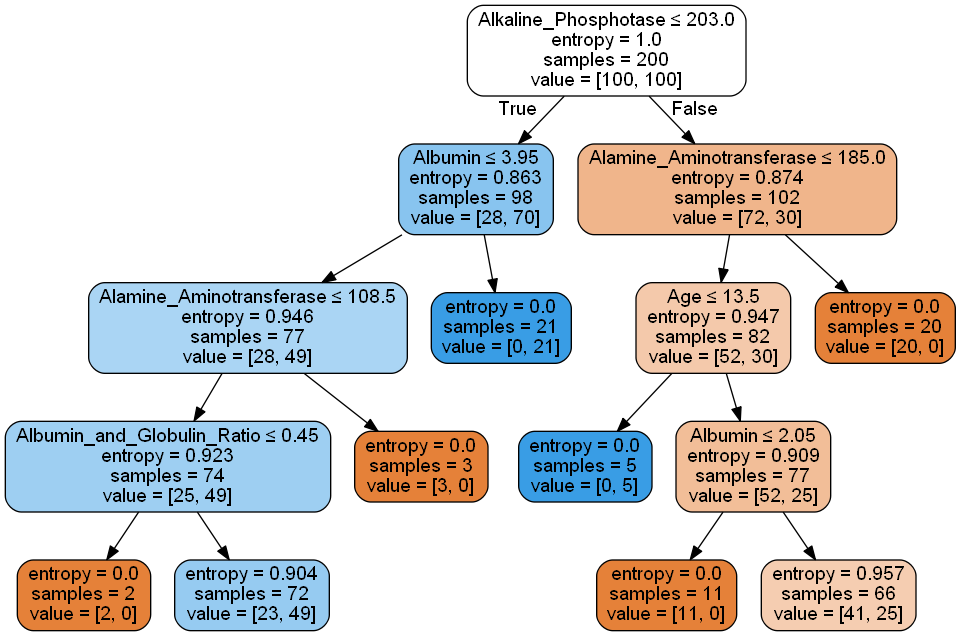

In [20]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image 

DecisionTree = StringIO()
# export_graphviz(obtained_tree, out_file=DecisionTree, feature_names=["Plays fetch","Is grumpy","Favorite food"])

export_graphviz(obtained_tree, out_file=DecisionTree,  
                filled=True, rounded=True, feature_names=cols[:-1],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(DecisionTree.getvalue())  
Image(graph.create_png())